In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

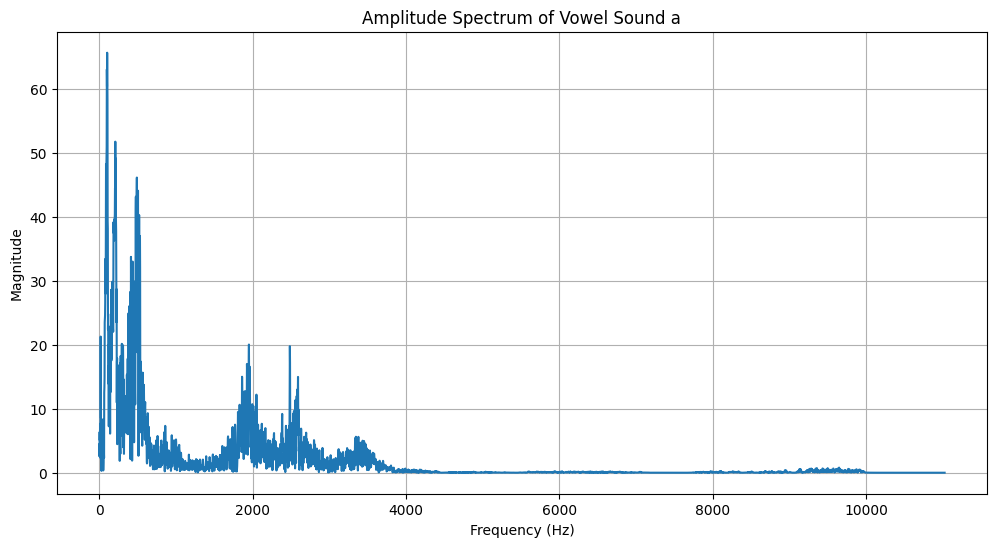

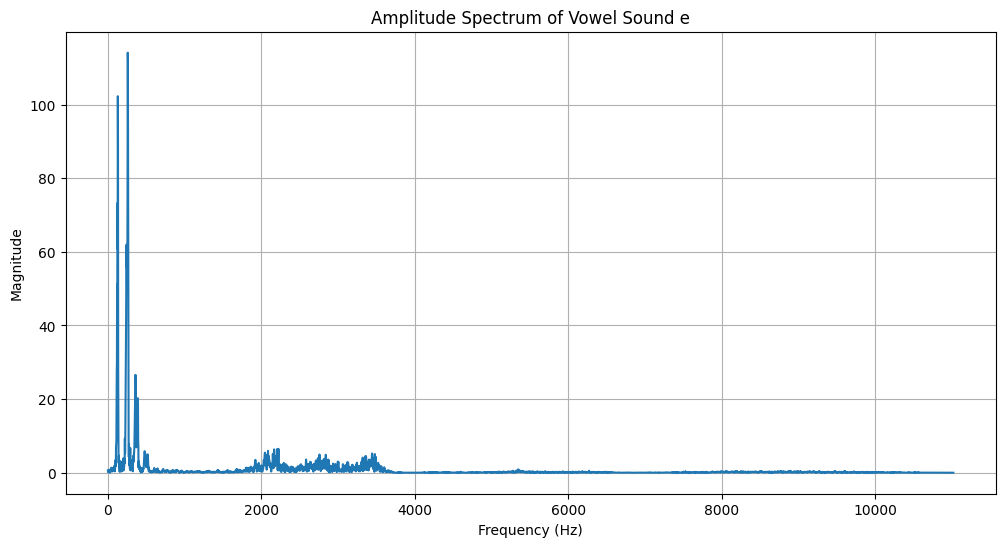

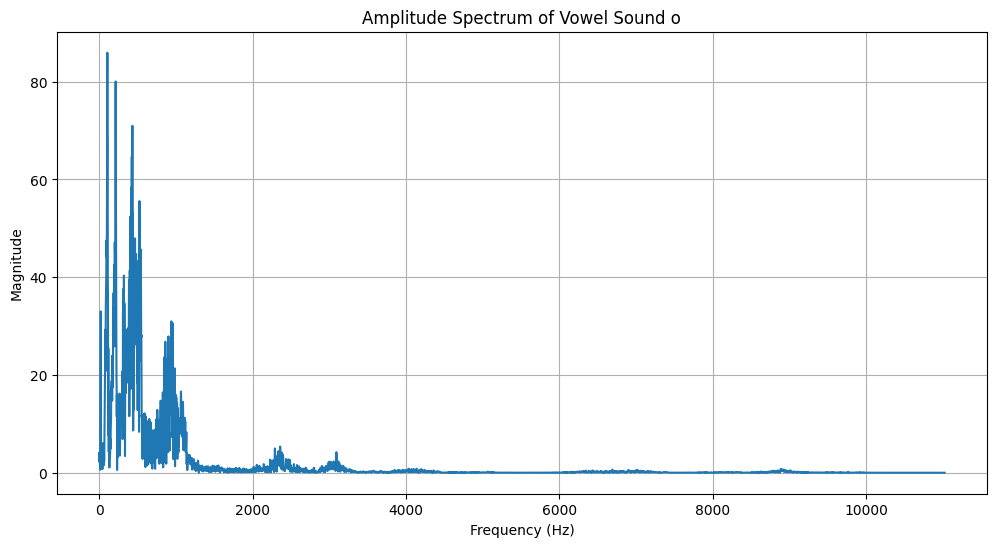

In [9]:
# Function to load audio and extract vowel sound
def extract_vowel_sound(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    
    return y, sr

# Function to perform FFT and plot the amplitude spectrum
def plot_amplitude_spectrum(signal, sr, vowel_name):
    # Calculate the FFT
    fft_result = np.fft.fft(signal)
    magnitude_spectrum = np.abs(fft_result)
    
    # Create frequency axis
    freqs = np.fft.fftfreq(len(fft_result), 1/sr)
    
    # Plot the amplitude spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(freqs[:len(freqs)//2], magnitude_spectrum[:len(freqs)//2])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(f'Amplitude Spectrum of Vowel Sound {vowel_name}')
    plt.grid(True)
    plt.show()

# Process each vowel sound file
vowels = ['a', 'e', 'o']
for vowel in vowels:
    file_path = f'{vowel}.mp3'
    vowel_sound, sr = extract_vowel_sound(file_path)
    plot_amplitude_spectrum(vowel_sound, sr, vowel)


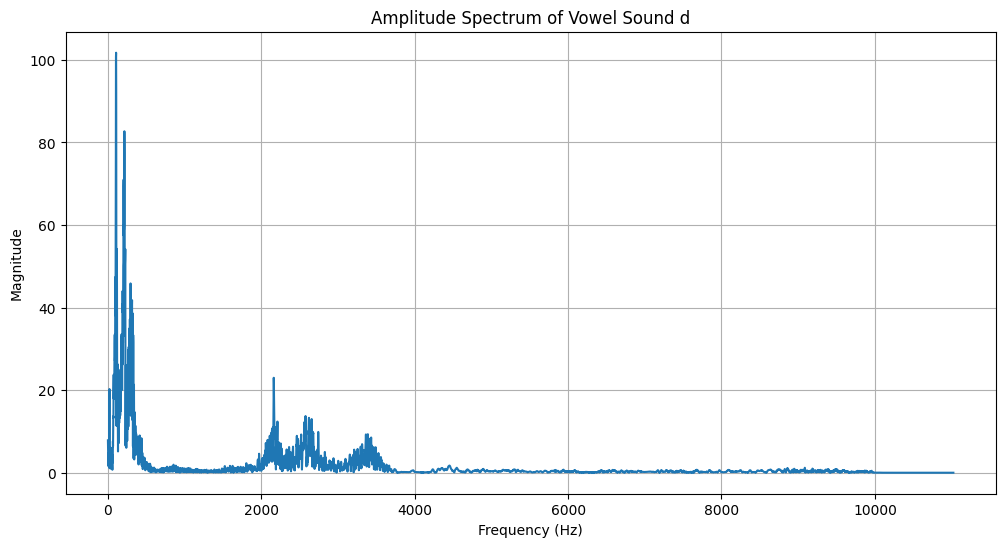

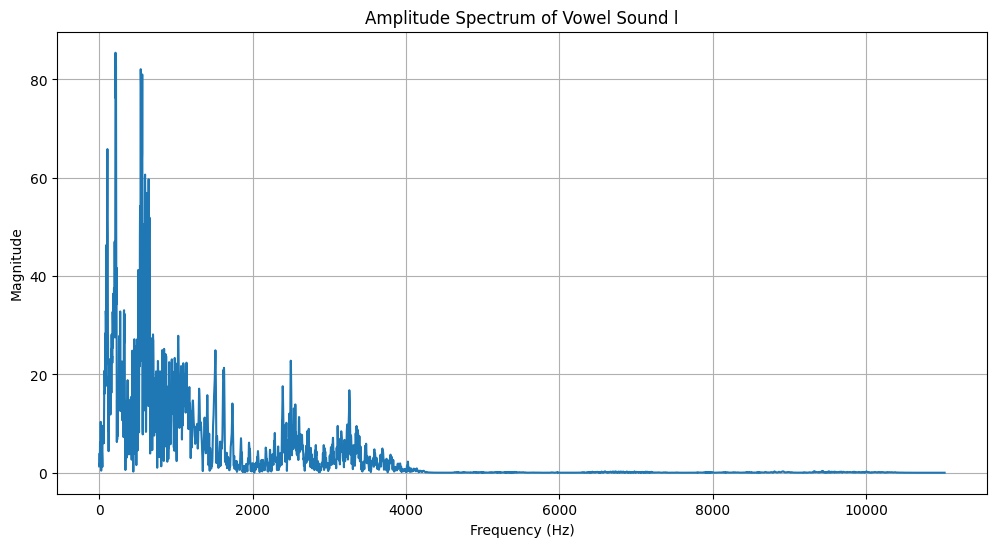

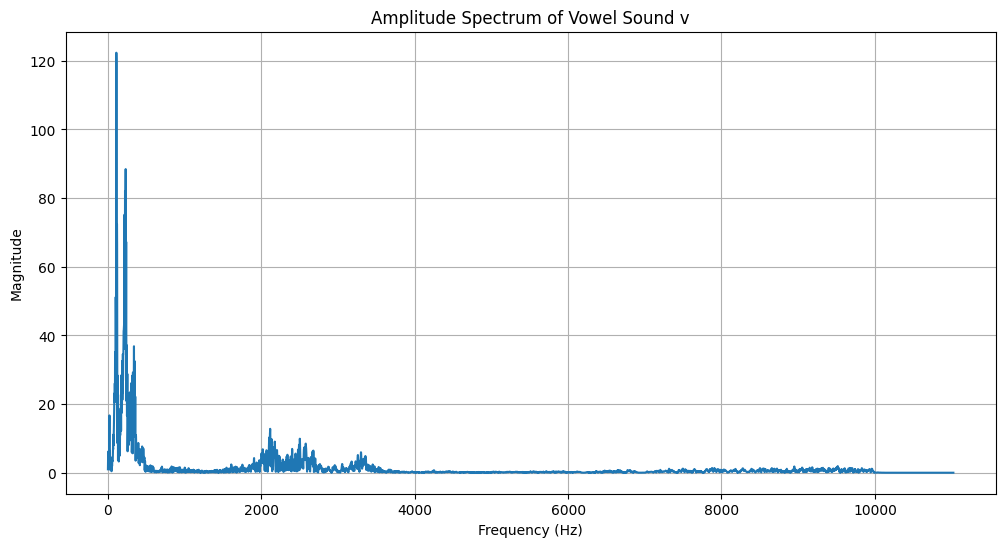

In [10]:
# Process each consonant sound file
consonants = ['d', 'l', 'v']
for consonant in consonants:
    file_path = f'{consonant}.mp3'
    consonant_sound, sr = extract_vowel_sound(file_path)
    plot_amplitude_spectrum(consonant_sound, sr, consonant)


C:\Users\ragna\AppData\Local\Temp\ipykernel_10692\2812810387.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  silence_audio, sr = librosa.load(silence_file_path)
c:\Users\ragna\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


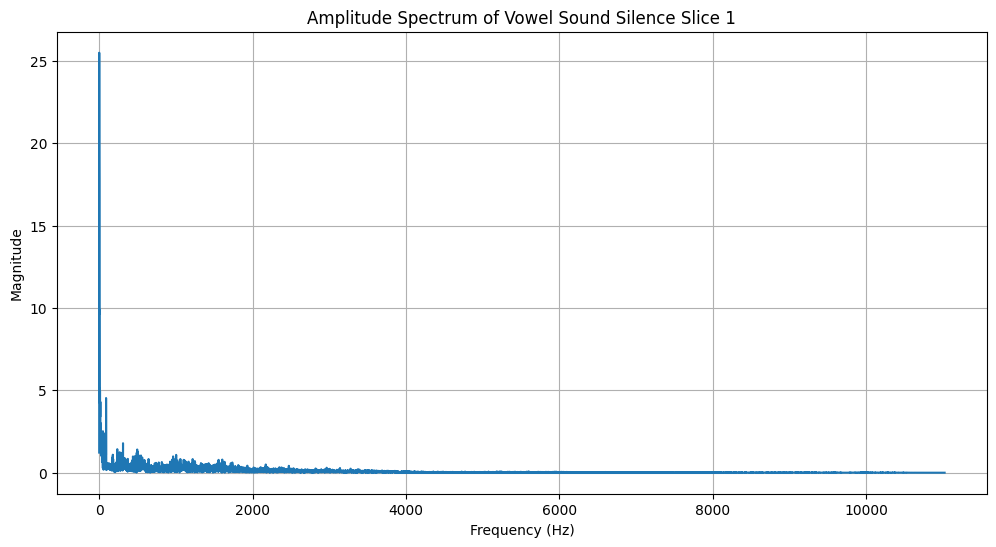

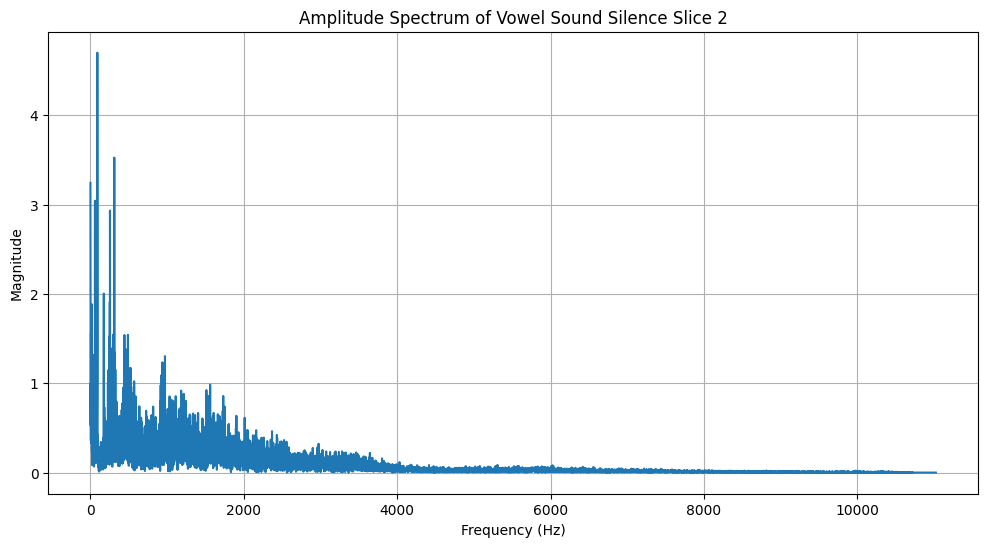

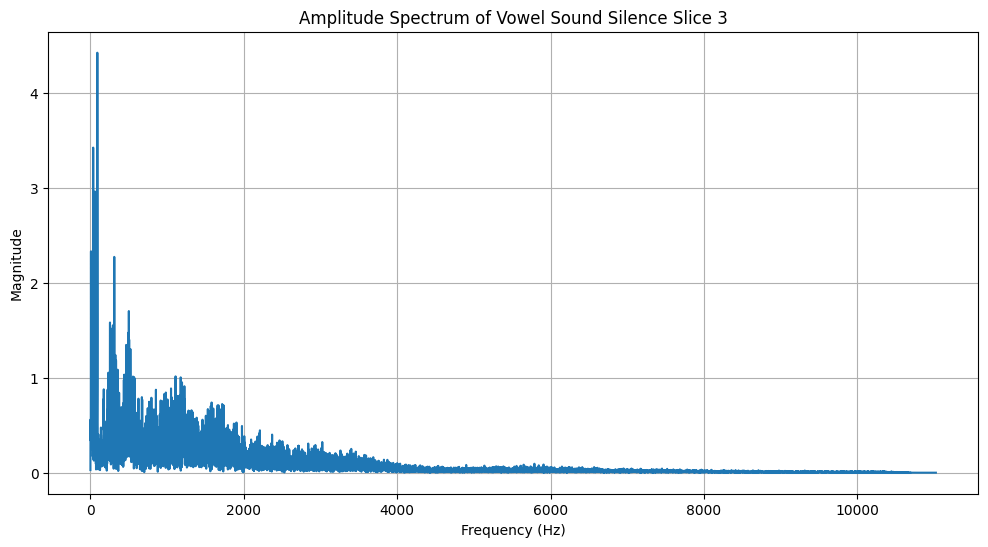

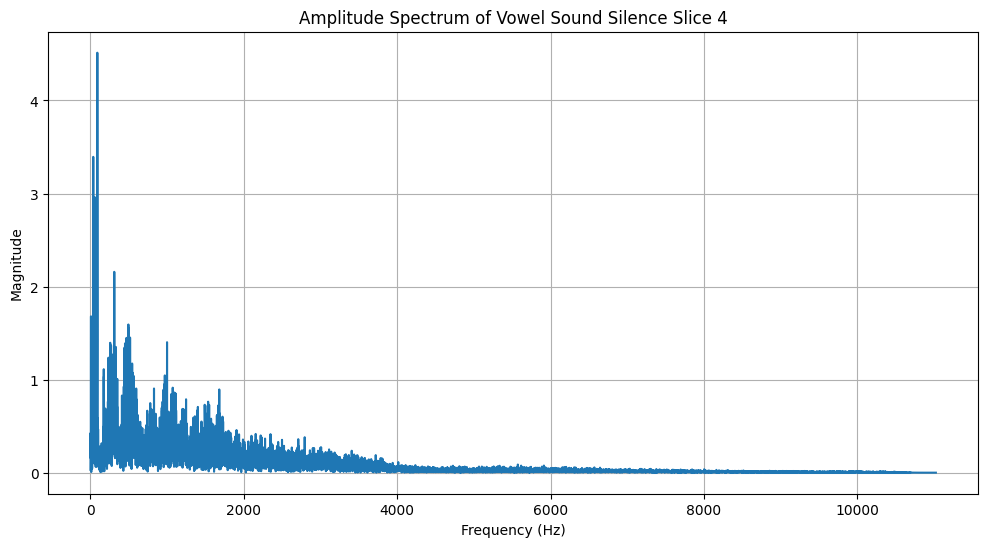

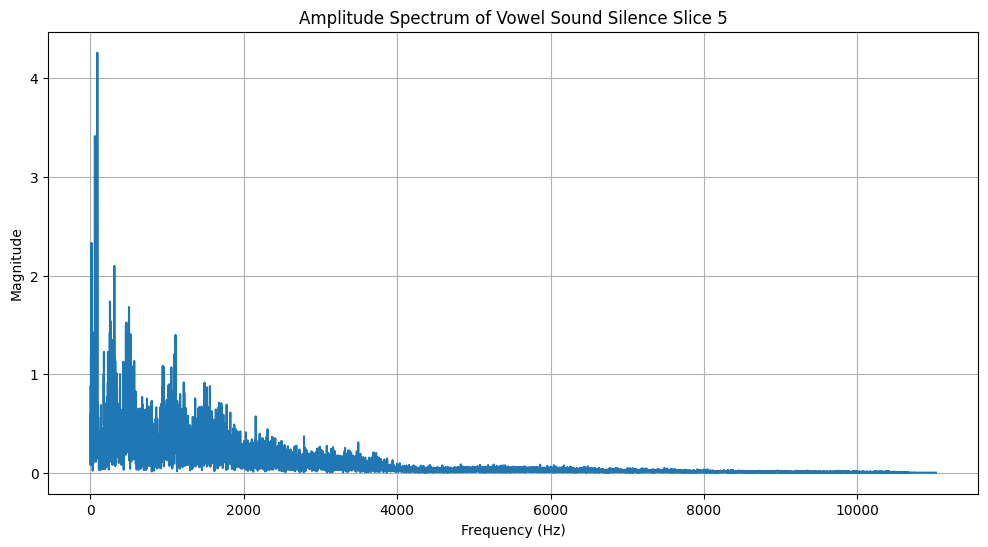

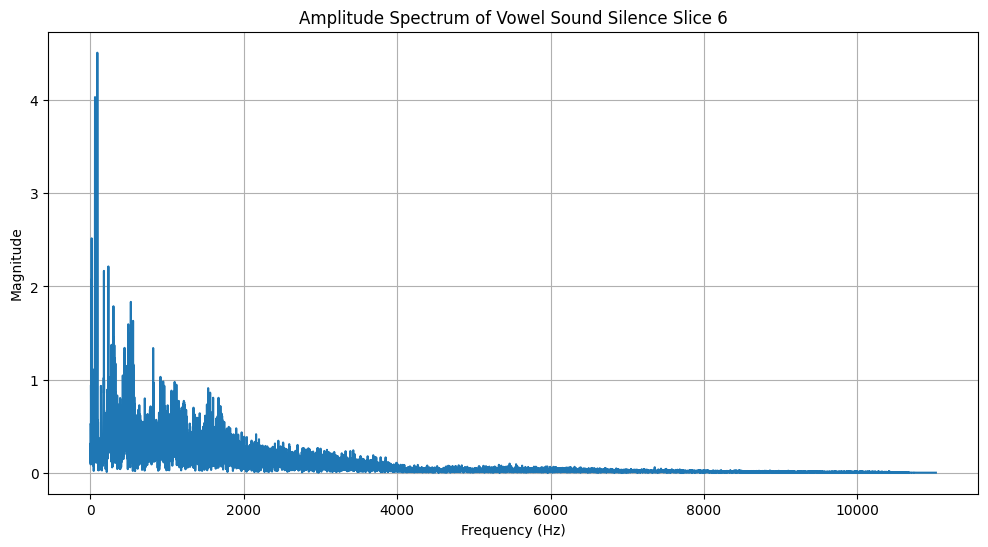

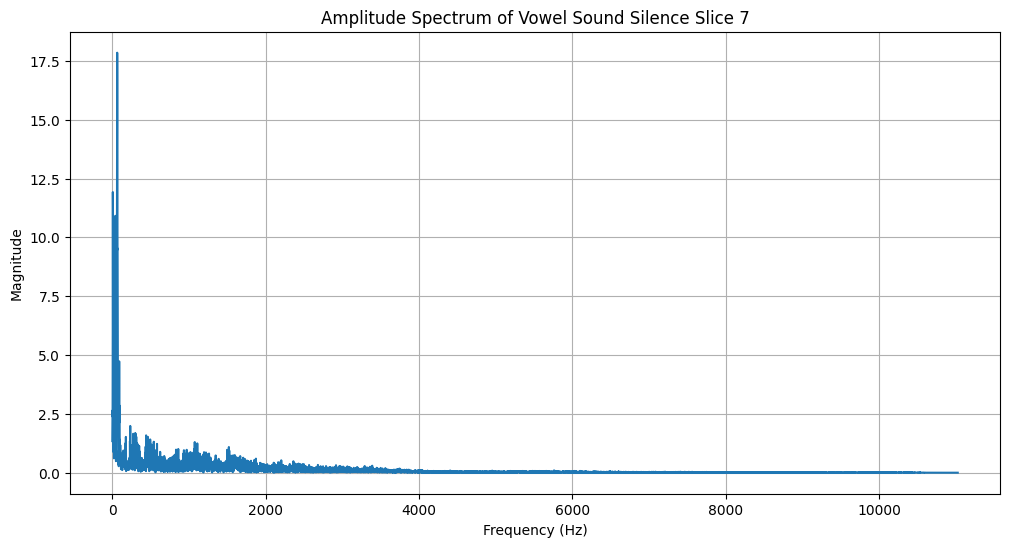

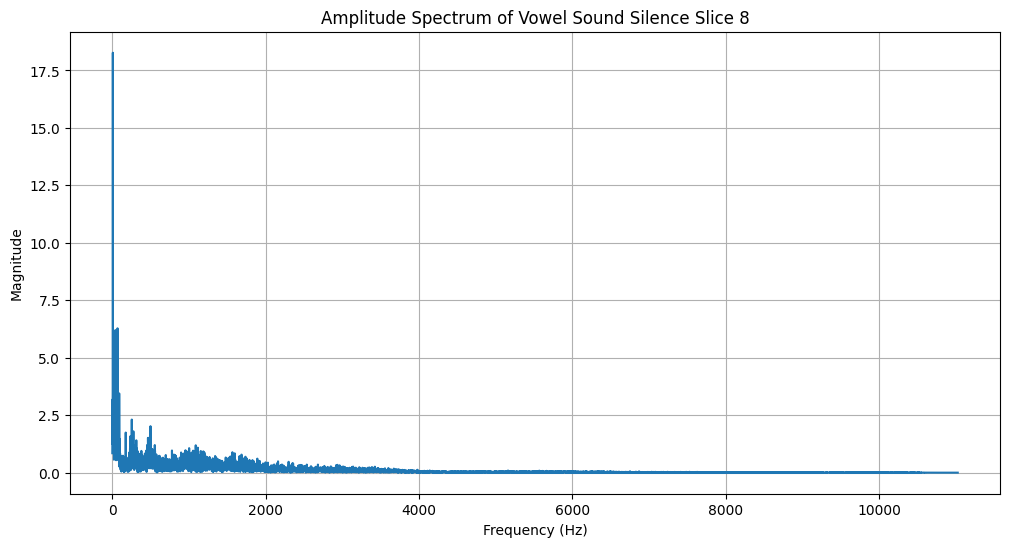

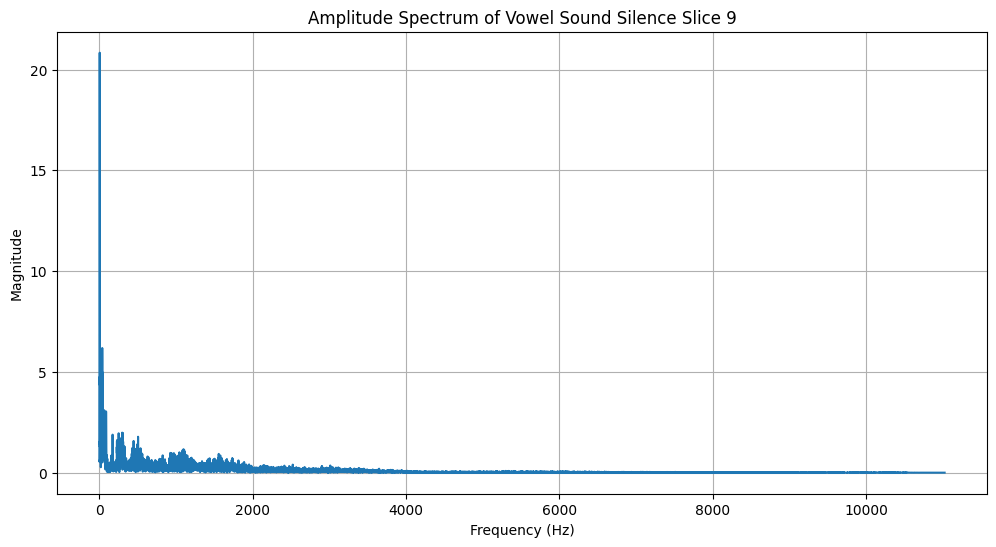

In [11]:
# Load the silence audio file
silence_file_path = 'Silence.mp3'
silence_audio, sr = librosa.load(silence_file_path)

# Split the silence audio into smaller slices (e.g., 1-second slices)
slice_duration = 1  # in seconds
num_slices = len(silence_audio) // (sr * slice_duration)

for i in range(num_slices):
    start_sample = i * sr * slice_duration
    end_sample = (i + 1) * sr * slice_duration
    slice_audio = silence_audio[start_sample:end_sample]
    plot_amplitude_spectrum(slice_audio, sr, f'Silence Slice {i+1}')

C:\Users\ragna\AppData\Local\Temp\ipykernel_10692\100497937.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)


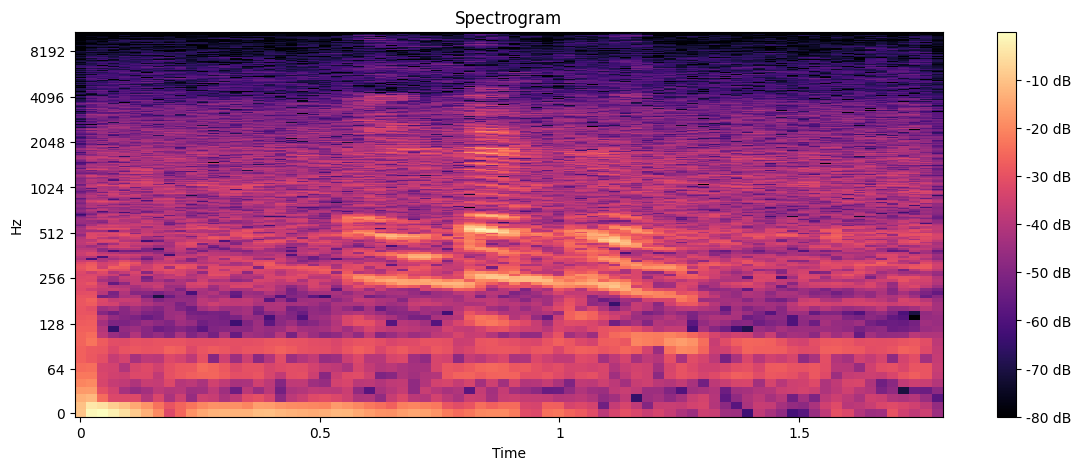

In [13]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
file_path = 'elden ring.mp3'
y, sr = librosa.load(file_path)

# Compute the spectrogram
D = np.abs(librosa.stft(y))

# Plot the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()
